### Gerekli Kütüphanelerin İmport Edilmesi

In [9]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
import matplotlib.pyplot as plt

### Veri Ön İşleme Adımları

In [2]:
# Veri setini indir, train ve test setlerine ayır
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Verileri yeniden boyutlandır
x_train = x_train.reshape(60000, 28 * 28)
x_test = x_test.reshape(10000, 28 * 28)

# Verileri normalize et
x_train = x_train / 255.0
x_test = x_test / 255.0

# Verileri etiketle
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

11490434/11490434 [==============================] - 0s 0us/step


### Modeli Oluşturulması, Derlenmesi, Eğitilmesi ve Test Edilemesi

In [3]:
# Modeli oluştur
model = Sequential([
    Dense(units=128, input_dim=x_train.shape[1], activation="relu"),
    Dense(units=64, activation="relu"),
    Dense(units=10, activation="softmax"),
])

# Modeli Derle
model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Modeli Özetle
model.summary()

# Modeli eğit
training_results = model.fit(
    x_train, y_train,
    batch_size=32,
    epochs=10,
    validation_split=0.1
)

# Modeli test et
loss, acc = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss} | Test Accuracy: {acc}")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2698 - accuracy: 0.9211 - val_loss: 0.1443 - val_accuracy: 0.9595
Epoch 2/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1787 - accuracy: 0.9508 - val_loss: 0.1618 - val_accuracy:

### Sonuçların Görselleştirilmesi

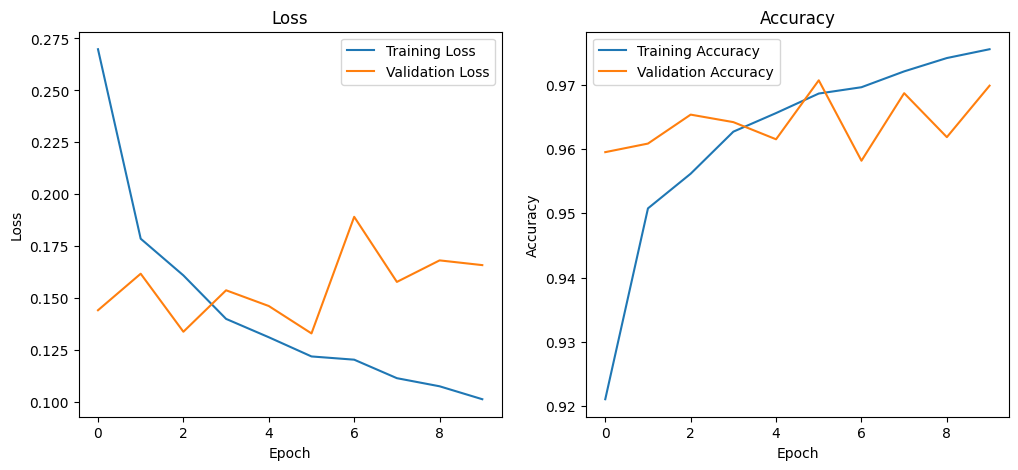

In [7]:
# Sonuçları Görselleştir
plt.figure(figsize=(12 ,5))

# loss
plt.subplot(1, 2, 1)
plt.plot(training_results.history["loss"], label="Training Loss")
plt.plot(training_results.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss")

# accuracy
plt.subplot(1, 2, 2)
plt.plot(training_results.history["accuracy"], label="Training Accuracy")
plt.plot(training_results.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy")

plt.show()

### Modelin Kaydedilmesi


In [10]:
# Modeli Kaydet
model.save("model.h5")

# Modelin Ağırlıklarını Kaydet
model.save_weights("model.weights.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
